## 房价预测
- 有10年的房价历史数据
- x轴表示月份0，1，2，...， 120
- y轴表示月份0，1，2，...， 120对应的房价
- 预测未来6个月（半年）的房价

In [1]:
#python 3.7.6
#torch 1.4.0
#numpy 1.18.1

import torch
from torch.autograd import Variable
import numpy as np

### 1.数据准备阶段

In [2]:
# 构建x轴训练数据
x_train = torch.arange(1, 121, 1)
x_train

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120])

In [3]:
#随机生成120个满足标准正态分布的随机数，均值为0，方差为1.将这个数字乘以10，标准方差变为10
rand = torch.randn(120) * 10
rand

tensor([ 3.7983e+00, -7.7519e+00, -1.8056e+00, -1.0236e+01,  2.7540e+00,
         1.0340e+01,  3.4387e-01, -1.8137e+01, -5.1146e+00, -4.2355e+00,
        -9.2992e+00, -5.0410e+00,  4.9327e+00,  7.9675e+00,  1.2683e+01,
        -5.5876e+00,  2.6069e+00,  5.9776e+00,  2.9577e+00,  4.8894e-01,
         6.2917e+00, -6.0891e+00,  2.1187e+01,  4.3058e-03, -4.8607e+00,
        -1.3789e+00,  1.3580e+00, -5.0936e+00,  1.6070e+01, -8.2496e-01,
         6.2875e+00, -1.2422e+00,  4.5350e+00,  3.4448e+00, -4.7641e+00,
         1.7672e+01,  1.4628e+01, -5.4535e+00, -1.3230e+01, -1.2294e+01,
        -1.1429e+01,  1.0239e+01,  7.7880e-01,  1.0421e+01, -1.3320e+00,
         1.1019e+01,  3.4577e+00, -8.7109e+00, -3.6392e+00, -8.5822e-01,
         8.7311e+00, -9.4546e+00, -6.8052e+00, -1.3744e+01,  9.2092e-02,
         9.5806e+00, -2.2685e+01, -1.8054e+01,  9.3085e+00,  6.9402e+00,
         1.9988e+01,  1.3812e+01,  1.5904e+00,  2.5882e-01,  4.9754e+00,
         8.7498e+00, -6.1164e+00,  1.2351e+01,  7.8

In [4]:
# 构建y轴训练数据
y_train = x_train + rand
y_train

tensor([  4.7983,  -5.7519,   1.1944,  -6.2357,   7.7540,  16.3397,   7.3439,
        -10.1374,   3.8854,   5.7645,   1.7008,   6.9590,  17.9327,  21.9675,
         27.6833,  10.4124,  19.6069,  23.9776,  21.9577,  20.4889,  27.2917,
         15.9109,  44.1865,  24.0043,  20.1393,  24.6211,  28.3580,  22.9064,
         45.0699,  29.1750,  37.2875,  30.7578,  37.5350,  37.4448,  30.2359,
         53.6719,  51.6280,  32.5465,  25.7696,  27.7062,  29.5708,  52.2389,
         43.7788,  54.4209,  43.6680,  57.0189,  50.4577,  39.2891,  45.3608,
         49.1418,  59.7311,  42.5454,  46.1948,  40.2559,  55.0921,  65.5806,
         34.3145,  39.9463,  68.3085,  66.9402,  80.9878,  75.8121,  64.5904,
         64.2588,  69.9754,  74.7498,  60.8836,  80.3513,  69.7842,  65.7758,
         71.6237,  96.5752,  68.0065,  64.6508,  64.9691,  60.4513,  99.3954,
         76.7808,  79.3915,  74.2516,  94.1622,  74.1425,  88.6944,  92.4632,
         87.4481,  90.4402, 106.0216,  80.3224,  97.8479,  96.62

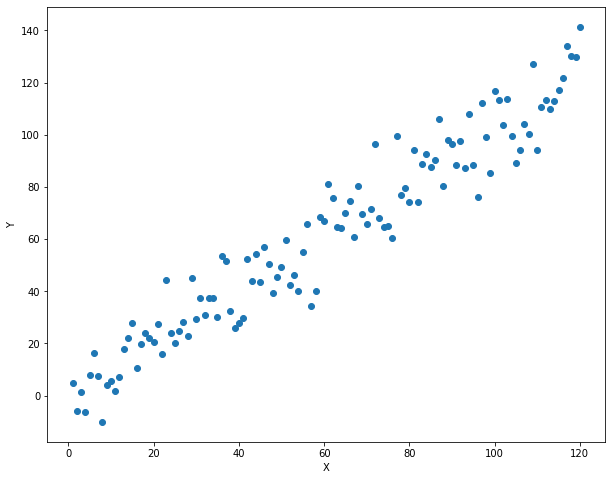

In [5]:
# 绘制历史数据图
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2. 训练阶段
- 线性回归公式  
prediction = a * x_train + b


- 损失函数  
loss = avg(square(y_train - prediction))  
=>  
loss = avg(square(y_train - a * x_train - b))

In [6]:
#创建a，b变量，并随机赋值初始化
a = torch.rand(1, requires_grad = True) 
b = torch.rand(1, requires_grad = True)
print('Initial parameters:', [a.data, b.data])

#设置学习率
learning_rate = 0.0001

#设置梯度下降的迭代次数，数字越大，迭代时间越长，最终得到的a，b值也会越准确
count = 1000
for i in range(count):
    #计算在当前a、b条件下的模型预测数值
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    
    #计算误差
    loss = torch.mean((y_train - predictions) ** 2)
    
    if i == 0:
        print('first loss:', loss.data)
    
    #对损失函数进行梯度反传
    loss.backward()
    
    #梯度下降learning_rate个单位
    a.data.add_(- learning_rate * a.grad.data)
    b.data.add_(- learning_rate * b.grad.data)
    
    if i == count - 1:
        print('end loss:', loss.data)
        print('data:', [a.data, b.data])
    
    #清空梯度信息，以免在backward的过程中反复累加
    a.grad.data.zero_()
    b.grad.data.zero_()

Initial parameters: [tensor([0.9288]), tensor([0.8200])]
first loss: tensor(133.7723)
end loss: tensor(98.9393)
data: [tensor([1.0142]), tensor([0.7604])]


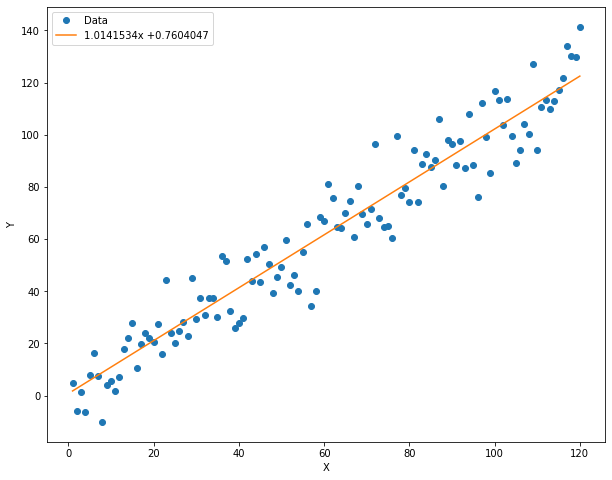

In [7]:
# 绘制拟合直线
plt.figure(figsize = (10, 8))
xplot, = plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')

# 绘制直线
x_data = x_train.data.numpy()
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())

# 绘制图例
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot],['Data', str1])

plt.show()

### 3.测试阶段

In [8]:
x_test = torch.arange(121, 127, 1)
x_test

tensor([121, 122, 123, 124, 125, 126])

In [9]:
#预测结果
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)
predictions

tensor([123.4730, 124.4871, 125.5013, 126.5154, 127.5296, 128.5437],
       grad_fn=<AddBackward0>)

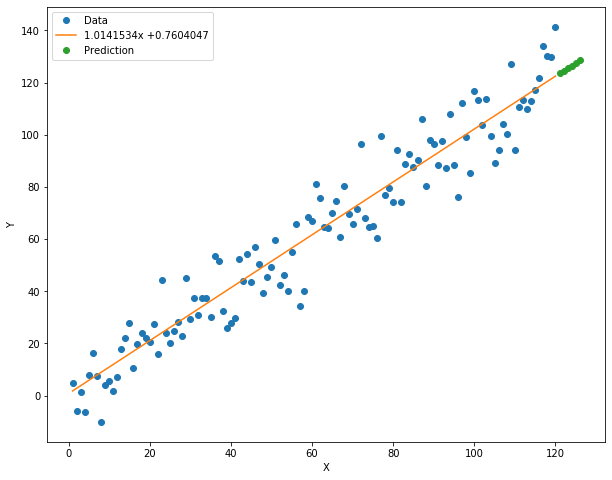

In [10]:
#绘制预测数据
plt.figure(figsize = (10, 8))
xplot, = plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')

# 绘制直线
x_data = x_train.data.numpy()
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())

# 绘制预测数据
x_pred = x_test.data.numpy()
pplot, = plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o')

# 绘制图例
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot, pplot],['Data', str1, 'Prediction'])

plt.show()